In [1]:

%matplotlib inline
import numpy as np 
import pandas as pd
pd.plotting.register_matplotlib_converters()
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# read data from .data format using sep to seperate the columns
df = pd.read_csv('parkinsons.data', sep=',')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# 
df.iloc[0,:]

name                phon_R01_S01_1
MDVP:Fo(Hz)                119.992
MDVP:Fhi(Hz)               157.302
MDVP:Flo(Hz)                74.997
MDVP:Jitter(%)             0.00784
MDVP:Jitter(Abs)           0.00007
MDVP:RAP                    0.0037
MDVP:PPQ                   0.00554
Jitter:DDP                 0.01109
MDVP:Shimmer               0.04374
MDVP:Shimmer(dB)             0.426
Shimmer:APQ3               0.02182
Shimmer:APQ5                0.0313
MDVP:APQ                   0.02971
Shimmer:DDA                0.06545
NHR                        0.02211
HNR                         21.033
status                           1
RPDE                      0.414783
DFA                       0.815285
spread1                  -4.813031
spread2                   0.266482
D2                        2.301442
PPE                       0.284654
Name: 0, dtype: object

In [4]:
df.shape

(195, 24)

In [5]:
# check the number of null data in each columns
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
# check for the columns of non-numerical type
df.loc[:, df.dtypes == 'object'].columns

Index(['name'], dtype='object')

In [7]:
# drop the name column since it is non-numerical data and not related to status
df = df.drop('name', axis='columns')

In [8]:
df_full = df.copy(deep=True)

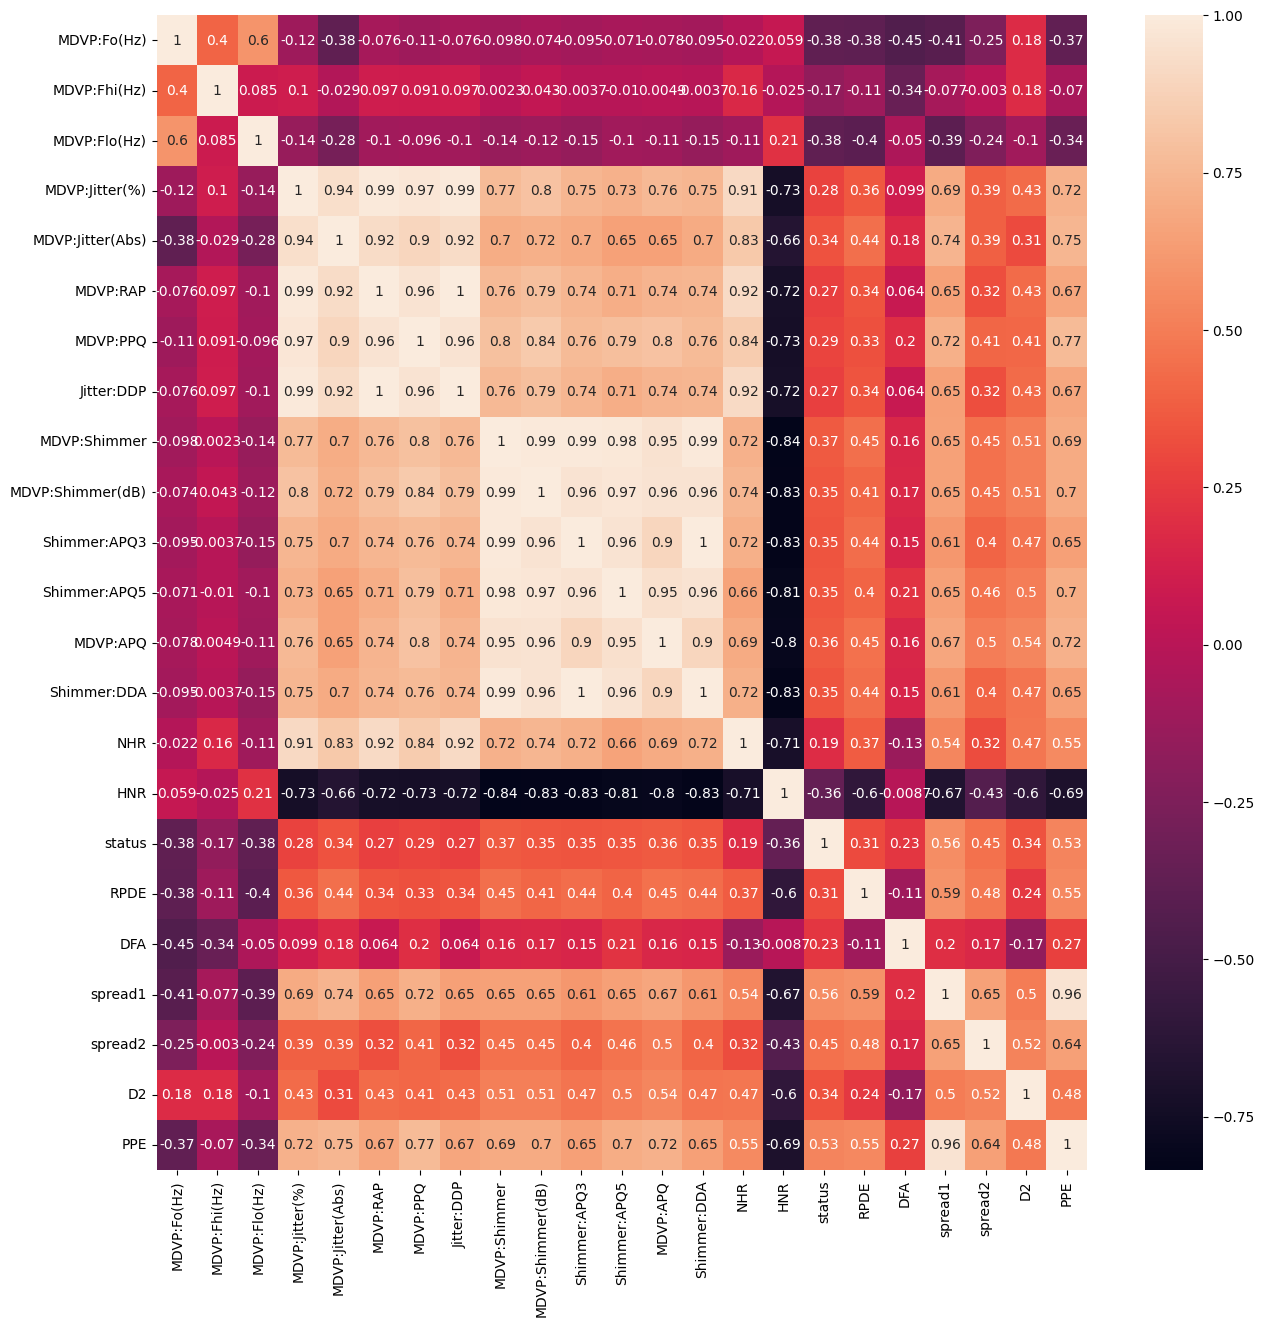

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(ax=ax,data=df.corr(), annot=True)

In [10]:
# duplicate the dataframse and use one-hot encoding for the status

one_hot = OneHotEncoder(sparse_output=False)
oh_status = pd.DataFrame(one_hot.fit_transform(df[['status']]))
oh_status.index = df.index

df_oh = pd.concat([df, oh_status], axis='columns').drop('status', axis='columns')
df_oh = df_oh.rename({0: "status-healthy", 1:'status-Parkinson'},axis='columns')
df_oh.columns = df_oh.columns.astype(str)
df_oh.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status-healthy,status-Parkinson
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0.0,1.0
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0.0,1.0
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0.0,1.0
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0.0,1.0
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0.0,1.0


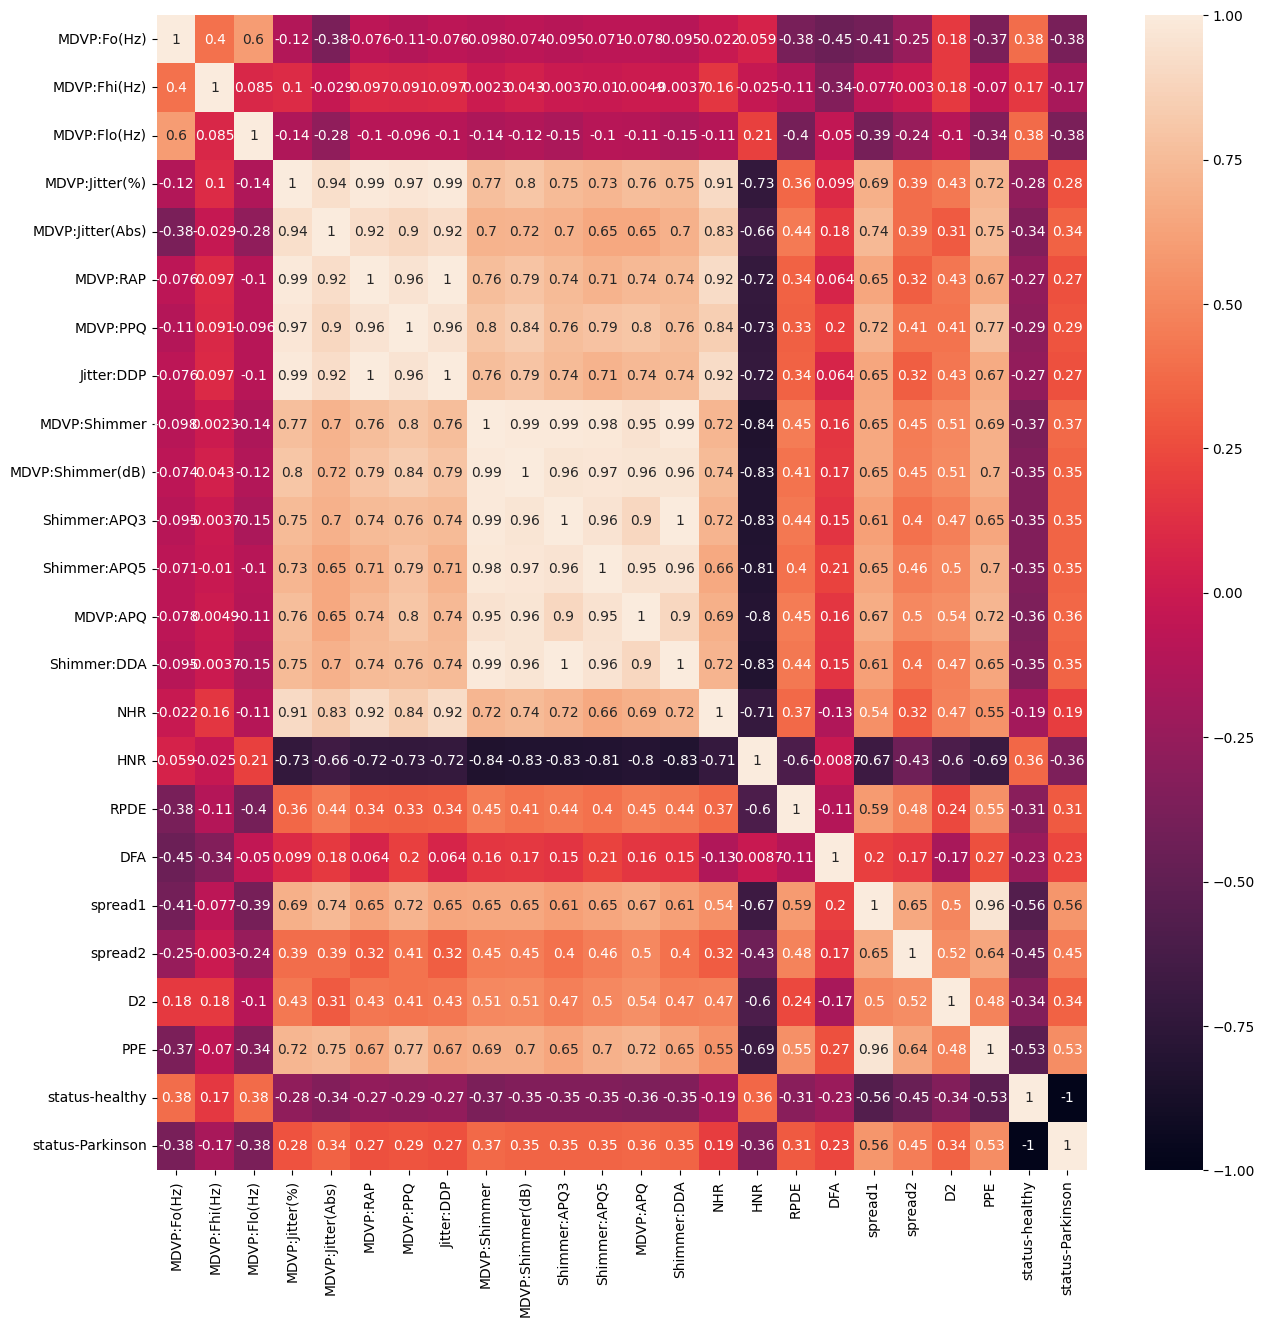

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(ax=ax,data=df_oh.corr(), annot=True)

## Some insight from heatmap diagram
* HNR is negatively correlated with most of the measures of variation in fundamental frequency and amplitute.
* Most of the Shimmers (variation of speech amplitude ) are highly correlated to each other, to ease the training of model, we may consider dropping most of the columns and leave one column 
* Also , Most MDVP columns (from Jitter to DDP) are highly correlated to each other, can also drop most of them


In [12]:
df_oh.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status-healthy', 'status-Parkinson'],
      dtype='object')

In [13]:
drop_col = [ 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA']

In [14]:
df_oh = df_oh.drop(drop_col, axis='columns')
df_oh.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status-healthy,status-Parkinson
0,119.992,157.302,74.997,0.00784,0.04374,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0.0,1.0
1,122.400,148.650,113.819,0.00968,0.06134,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,0.0,1.0
2,116.682,131.111,111.555,0.01050,0.05233,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,0.0,1.0
3,116.676,137.871,111.366,0.00997,0.05492,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,0.0,1.0
4,116.014,141.781,110.655,0.01284,0.06425,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,0.0,1.0


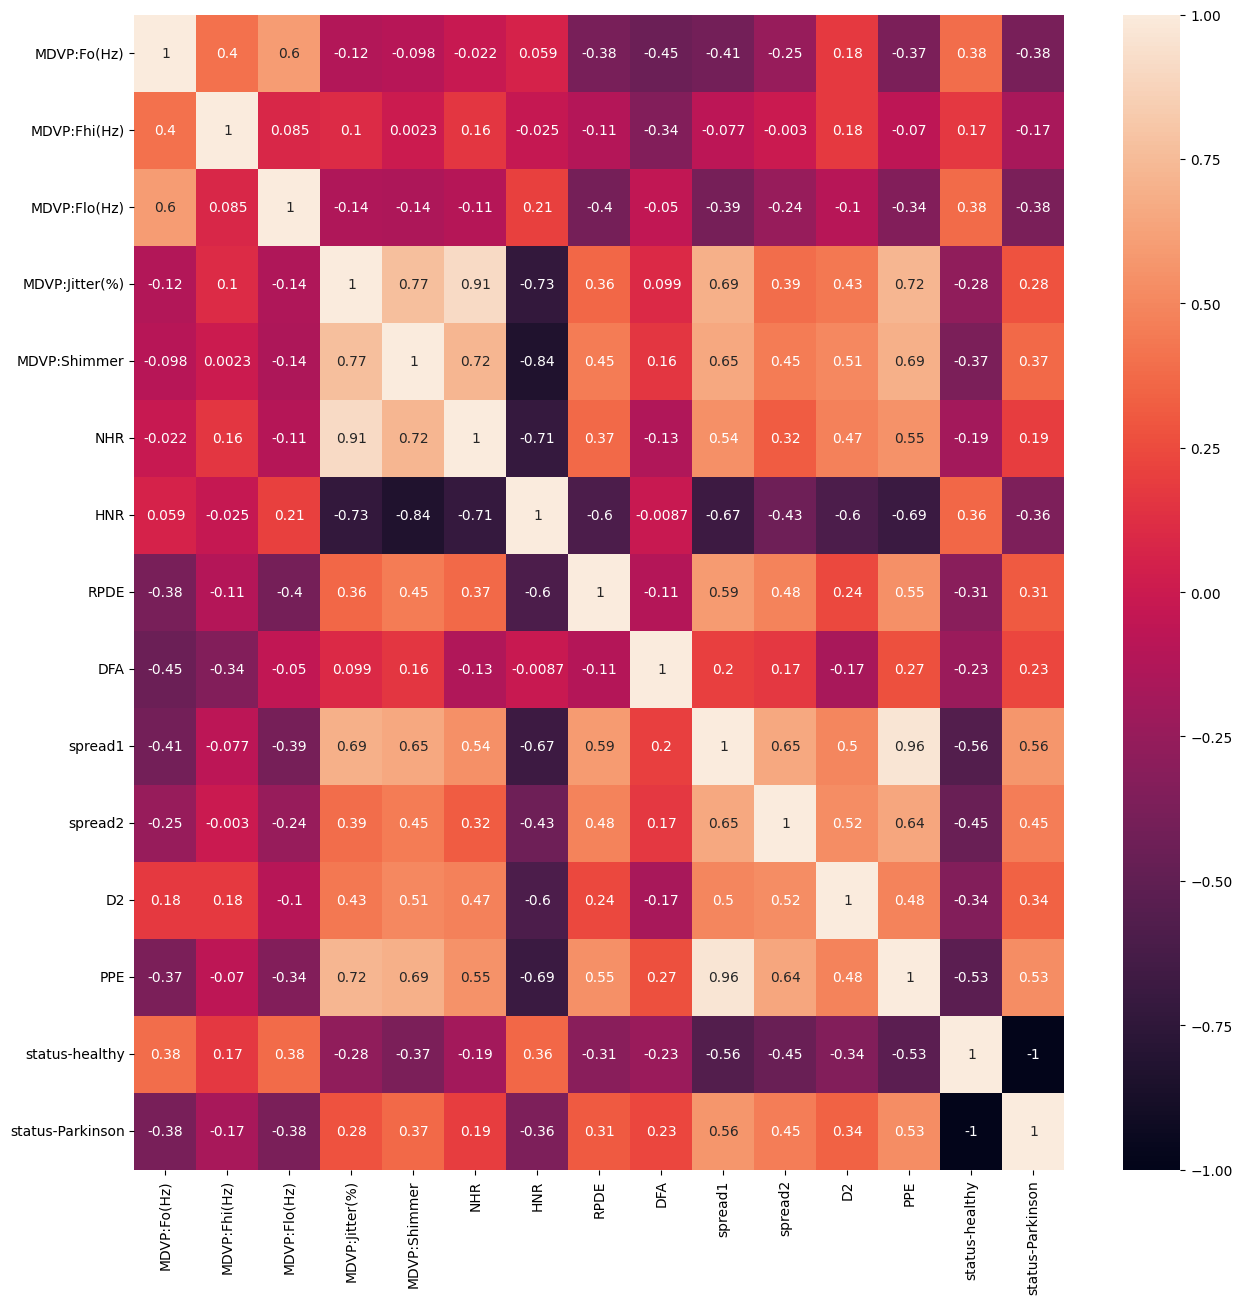

In [15]:
# make another heatmap diagram
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(ax=ax,data=df_oh.corr(), annot=True)

### Insight from the heatmap
* Most of the remaining columns have some kind of correlation with parkinson
* The one-hot encoding doesn't really affect the correlation. For the ease of ML model training, it is better to change it back to 1 columns and classify it as either classification problem or logistic regression problem 

In [16]:
df = df_oh.drop(['status-healthy'], axis='columns')
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status-Parkinson
0,119.992,157.302,74.997,0.00784,0.04374,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1.0
1,122.400,148.650,113.819,0.00968,0.06134,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1.0
2,116.682,131.111,111.555,0.01050,0.05233,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1.0
3,116.676,137.871,111.366,0.00997,0.05492,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1.0
4,116.014,141.781,110.655,0.01284,0.06425,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1.0


In [17]:
df = df.rename(columns={'status-Parkinson':'status'})
df['status'] = df['status'].astype(np.int8)
df.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.04374,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.06134,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.05233,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.05492,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.06425,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


## Use cross validation to see whether boosting or bagging perform better

## Random Forest

In [18]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier


In [19]:
y = df['status']
X = df.drop(['status'], axis='columns')
X.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Shimmer,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.04374,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.06134,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.05233,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.05492,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.06425,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [20]:
# use pipeline to define the random forest
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifer', RandomForestClassifier())
])

In [21]:
# we use grid search to find the best parameter for the random forest classifier
rf_para = [{
    'classifer__n_estimators': [20, 50, 100],
    'classifer__min_samples_leaf': [2, 5, 8],
    'classifer__min_samples_split': [2, 3, 4],
    'classifer__n_jobs' : [16]
}]

In [22]:
# modify base on previous results
rf_para = [{
    'classifer__n_estimators': [15],
    'classifer__min_samples_leaf': [10],
    'classifer__min_samples_split': [3],
    'classifer__n_jobs' : [16]
}]

In [23]:
rf_grid_search = GridSearchCV(pipe_rf, rf_para ,cv=5, scoring='accuracy', error_score='raise', verbose=1)
rf_grid_search.fit(X, y)
print(f"Best_parameter in this set: {rf_grid_search.best_params_}, Accurcy: {rf_grid_search.best_score_}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best_parameter in this set: {'classifer__min_samples_leaf': 10, 'classifer__min_samples_split': 3, 'classifer__n_estimators': 15, 'classifer__n_jobs': 16}, Accurcy: 0.7948717948717949


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)
std_sca = StandardScaler()
X_train_sc = std_sca.fit_transform(X_train)
X_test_sc = std_sca.transform(X_test)


In [25]:
rf = RandomForestClassifier(n_estimators = 15,min_samples_leaf=10, min_samples_split=3, n_jobs=16)
rf.fit(X_train_sc, y_train)
rf_pred = rf.predict(X_test_sc)
rf_score = accuracy_score(y_test, rf_pred)
print(f"The score of the random forest classifier is {rf_score}")

The score of the random forest classifier is 0.717948717948718


## Xgboost

In [26]:
pipe_xgb = Pipeline([
    ('classifer', XGBClassifier())
])

In [27]:
# Previous result
# Best_parameter in this set: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'classifer__n_estimators': 200}, Accurcy: 0.8307692307692308
xgb_param = {
    'classifer__n_estimators': [150, 200, 300],
    'classifer__learning_rate': [0.05, 0.1, 0.2],
    'classifer__max_depth': [3, 4, 5],
    'classifer__colsample_bytree': [0.8, 0.9],
    'classifer__gamma': [0, 0.25]
}

In [28]:
# final parameter
# # Best_parameter in this set: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'classifer__n_estimators': 200}, Accurcy: 0.8307692307692308
xgb_param = {
    'classifer__n_estimators': [200],
    'classifer__learning_rate': [0.1],
    'classifer__max_depth': [3],
    'classifer__colsample_bytree': [0.8],
    'classifer__gamma': [0]
}

In [29]:
xgb = GridSearchCV(pipe_xgb, xgb_param, cv=5, scoring='accuracy')
xgb.fit(X, y)
print(f"Best_parameter in this set: {xgb.best_params_}, Accurcy: {xgb.best_score_}")

Best_parameter in this set: {'classifer__colsample_bytree': 0.8, 'classifer__gamma': 0, 'classifer__learning_rate': 0.1, 'classifer__max_depth': 3, 'classifer__n_estimators': 200}, Accurcy: 0.8307692307692308


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)
std_sca = StandardScaler()
X_train_sc = std_sca.fit_transform(X_train)
X_test_sc = std_sca.transform(X_test)

The accuracy is 0.9487179487179487


<Axes: >

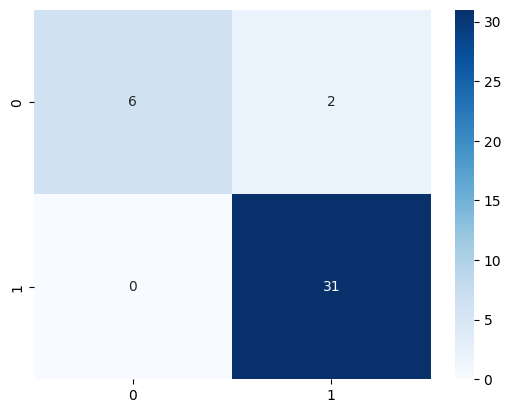

In [31]:
xgb_final = XGBClassifier(n_estimators = 200, learning_rate=0.1, max_depth = 3, colsample_bytree=0.8, gamma=0, objective='binary:logistic')
xgb_final.fit(X_train_sc, y_train)
pred_xgb = xgb_final.predict(X_test_sc)
acc = accuracy_score(y_test, pred_xgb)
print(f"The accuracy is {acc}")
con_mat = confusion_matrix(y_test, pred_xgb)
sns.heatmap(con_mat, annot=True, cmap="Blues")

In [32]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.94      1.00      0.97        31

    accuracy                           0.95        39
   macro avg       0.97      0.88      0.91        39
weighted avg       0.95      0.95      0.95        39



In [33]:
xgb_final.fit(X, y)
xgb_final.save_model('Current_best_model.json')

## Model expalinability


In [34]:
import shap


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [35]:

explainer = shap.Explainer(xgb_final)
shap_value = explainer(X)
shap.initjs()

[20:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


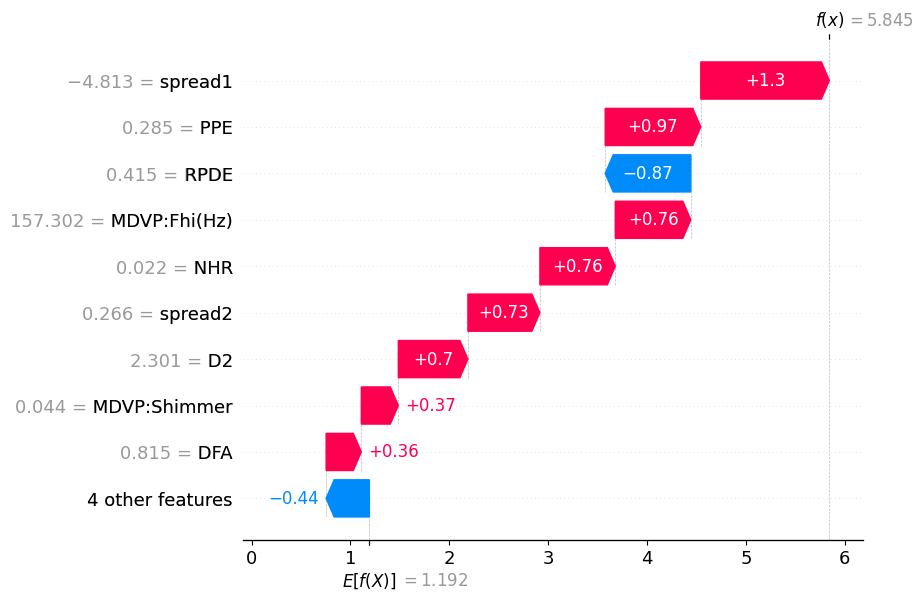

In [36]:
shap.plots.waterfall(shap_value[0])

In [37]:
shap.force_plot(shap_value)

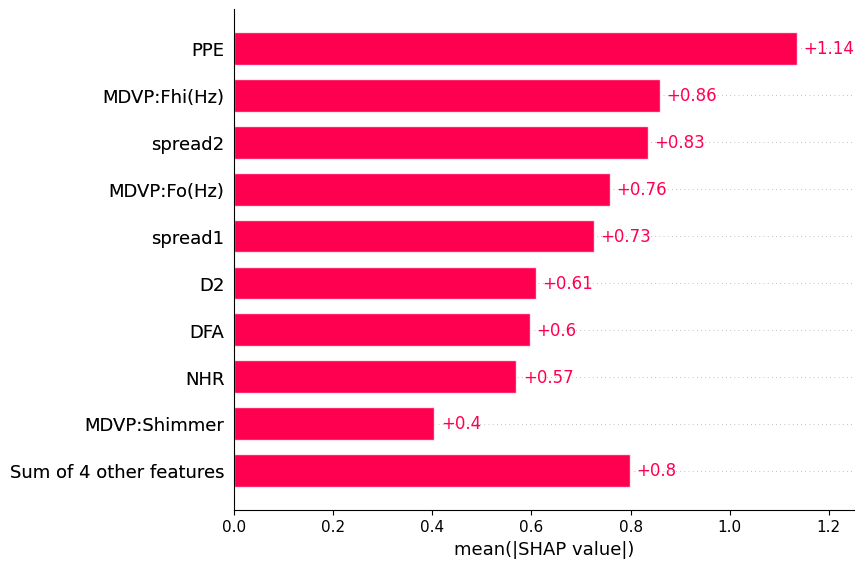

In [38]:
shap.plots.bar(shap_value)

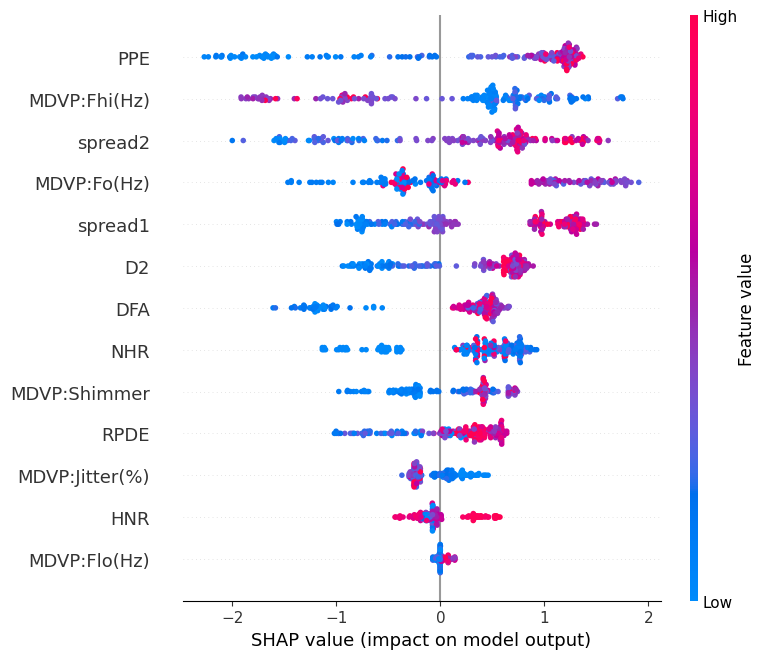

In [39]:
shap.summary_plot(shap_value, X)